<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/ProjetoGr%C3%A1ficos_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
dados = read.csv("dados.csv" , sep = ";" , na.strings="" , stringsAsFactors = TRUE )
#Atividade:
#Empenho em diárias em municípios gaúchos e PIB dos municípios
#Atividade exploratória dos dados
summary(dados)

     CODIGO                        MUNICIPIO        PIB        
 Min.   :  1.0   CERRO BRANCO           :  2   Min.   :  8237  
 1st Qu.:141.0   DOUTOR MAURICIO CARDOSO:  2   1st Qu.: 13621  
 Median :242.0   MATO LEITAO            :  2   Median : 17206  
 Mean   :247.2   MONTE ALEGRE DOS CAMPOS:  2   Mean   : 19809  
 3rd Qu.:372.5   MULITERNO              :  2   3rd Qu.: 21429  
 Max.   :496.0   NOVA BOA VISTA         :  2   Max.   :223848  
                 (Other)                :175                   
  VALOREMPENHO      
 Min.   :    172.1  
 1st Qu.:  52517.2  
 Median :  84228.2  
 Mean   : 129984.4  
 3rd Qu.: 153896.1  
 Max.   :1442759.8  
                    

In [56]:
x = table(dados$CODIGO)
print(x)
#Aqui percebe-se que o código 372, 378 e o código 141 possuem 4 ocorrências cada


  1   7   9  13  14  15  16  23  28  30  33  36  38  46  51  52  53  54  55  59 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 60  61  65  70  75  77  79  83  95  96  97  98  99 106 107 108 109 113 118 120 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
125 126 129 137 139 140 141 146 147 149 150 151 152 153 154 155 156 158 162 163 
  1   1   1   1   1   1   4   1   1   1   1   1   1   1   1   1   1   1   1   1 
169 170 174 175 176 179 181 182 183 186 187 191 194 196 197 198 201 204 211 216 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
220 222 225 226 227 228 232 238 239 240 242 243 248 251 259 263 264 265 269 270 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   4   1   1   1   1   1 
272 273 274 276 280 283 284 285 288 290 295 296 297 300 305 311 313 315 316 318 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
321 325 329 334 346 351 352

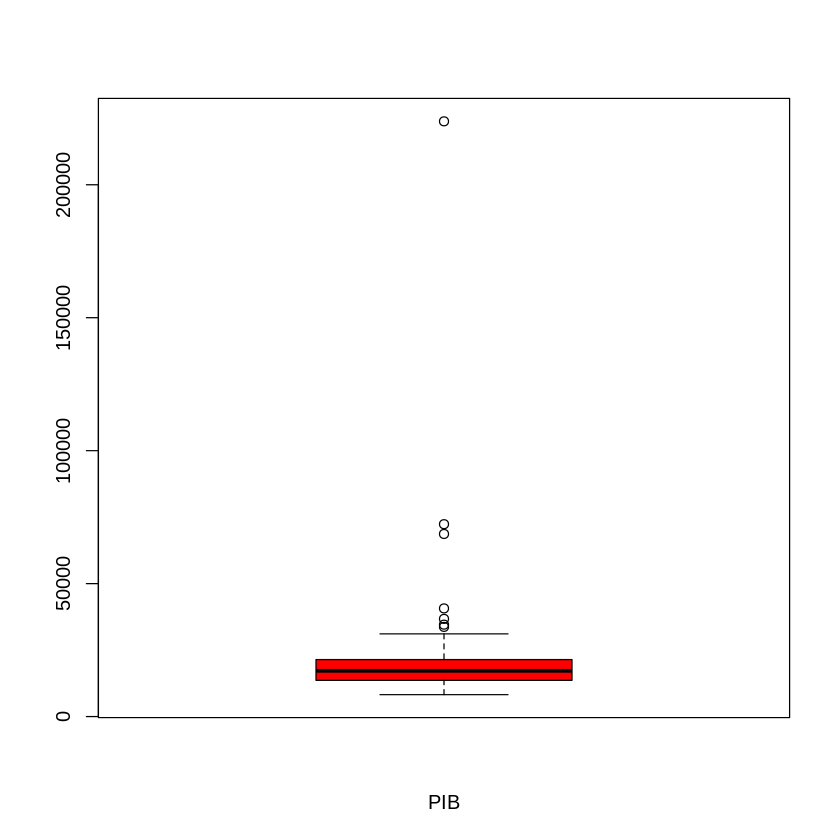

In [ ]:
#BOXPLOT do PIB, há um outlier perto do valor 200000
boxplot(dados$PIB , xlab= "PIB" , col ='red')

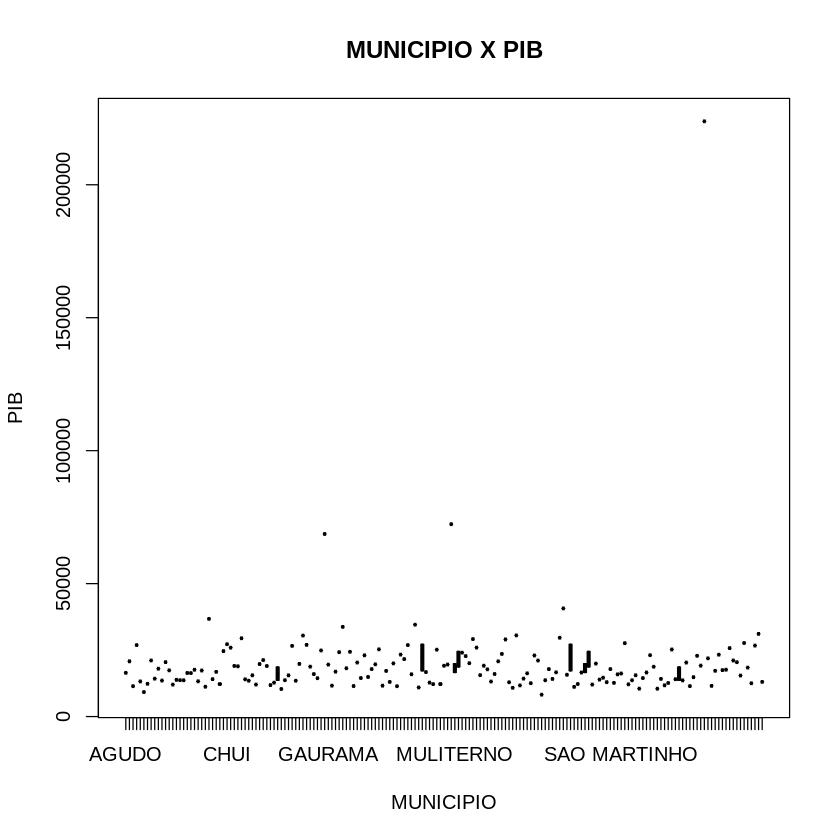

In [ ]:
#Não é a visualização mais ideal, pois há no total +100 municípios para serem visualizados.
plot(dados$MUNICIPIO , dados$PIB, main = "MUNICIPIO X PIB" , xlab = "MUNICIPIO" , ylab = "PIB",col = 'black' , type = 'l' )

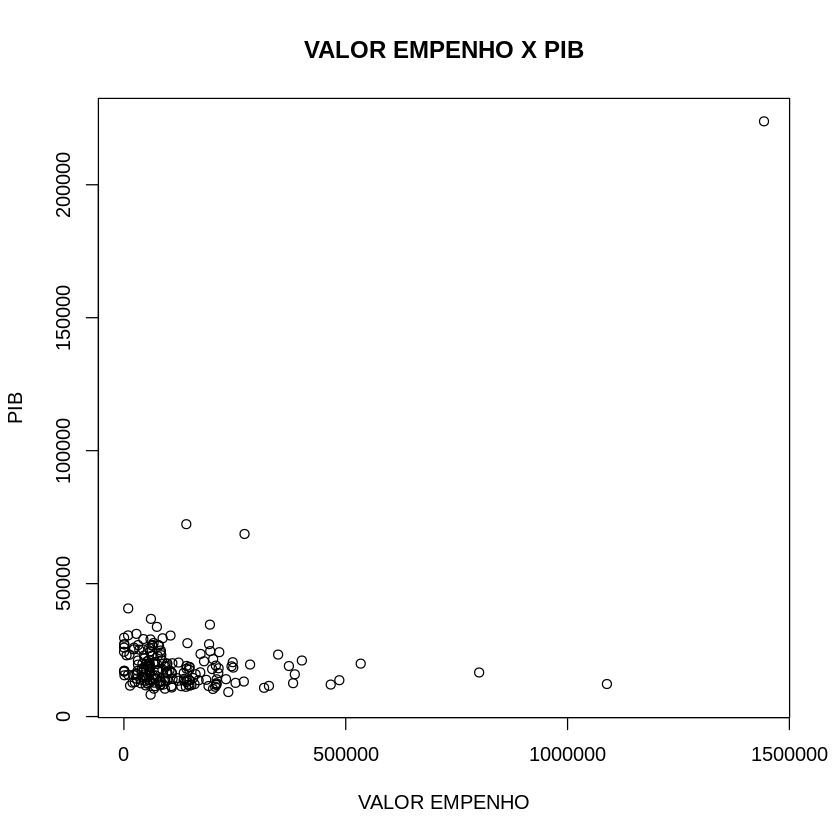

In [ ]:
#Como a qtd de municípios é grande demais, o ideal seria um gráfico de dispersão
plot(dados$VALOREMPENHO, dados$PIB , main = "VALOR EMPENHO X PIB" , xlab = "VALOR EMPENHO" , ylab = "PIB")

In [ ]:
#O código precisa ser único para cada município.
#Os mesmos municípios com o código 372
library(dplyr)

dados %>%
  group_by(MUNICIPIO) %>%
  filter(n_distinct(CODIGO) == 1 & unique(CODIGO) == 372) %>%
  distinct(MUNICIPIO) %>%
  pull(MUNICIPIO) %>%
  print()
#Aqui é perceptível que os municípios mato leitão e Santa vitória do palmar possuem o mesmo código de 372


[1] MATO LEITAO             SANTA VITORIA DO PALMAR
177 Levels: AGUDO AJURICABA ALECRIM ALMIRANTE TAMANDARE DO SUL ... VILA NOVA DO SUL


In [52]:
#Aqui, será atribuído um valor diferente de código ao município MATO LEITAO, diferenciando-se pelo VALOR EMPENHO,
#NESSE CASO, será relacionado a coluna código e valorempenho para realizar a modificação
#Mudar o código com base no valor empenho.
#Porque de 497 até 500? porque são os únicos valores que ainda não foram colocados...Ali em cima, a base termina em 496
dados$CODIGO[dados$VALOREMPENHO == 17213.98 & dados$CODIGO == 372 ] == 497
dados$CODIGO[dados$VALOREMPENHO == 27170.89 & dados$CODIGO == 372] == 498
dados$CODIGO[dados$MUNICIPIO == "SANTA VITORIA DO PALMAR" & dados$VALOREMPENHO == 17213.98] == 499
dados$CODIGO[dados$MUNICIPIO == "SANTA VITORIA DO PALMAR" & dados$VALOREMPENHO== 27170.89] == 500


logical(0)

logical(0)

logical(0)

logical(0)

In [58]:
dados[dados$CODIGO %in% 497:500, c("MUNICIPIO", "CODIGO")]
print(dados)

MUNICIPIO,CODIGO
<fct>,<int>


    CODIGO                  MUNICIPIO       PIB VALOREMPENHO
1      106      SANTANA DO LIVRAMENTO  12240.76   1088666.10
2      113               SANTO ANGELO  16575.82    800669.92
3      118     SAO FRANCISCO DE ASSIS  12037.61    466122.80
4       13            CACAPAVA DO SUL  13674.54    485535.86
5      120                SAO GABRIEL  19912.38    533719.86
6       98                     QUARAI  12552.51    381286.24
7       95                   PIRATINI  10811.67    315884.50
8      325                      TUNAS  11543.02    326884.60
9      126           SAO LUIZ GONZAGA  15887.14    385185.68
10     153                 URUGUAIANA  21084.19    401124.62
11      36                DOM PEDRITO  19013.71    371857.25
12     248            AMARAL FERRADOR   9216.87    235327.02
13     297             PARAISO DO SUL  13170.25    270262.04
14     125        SAO LOURENCO DO SUL  12674.70    251561.35
15     239                       JOIA  23312.14    347560.44
16      38        ENCRUZ